# Grouping and Aggregating with Time Series Analysis

In [6]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

### Aggregating weekly crime and traffic accidents separately

In [7]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [8]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [9]:
crime_sort.resample('Q').sum().head()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442


In [10]:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [11]:
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [12]:
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly2.equals(crime_quarterly)

True

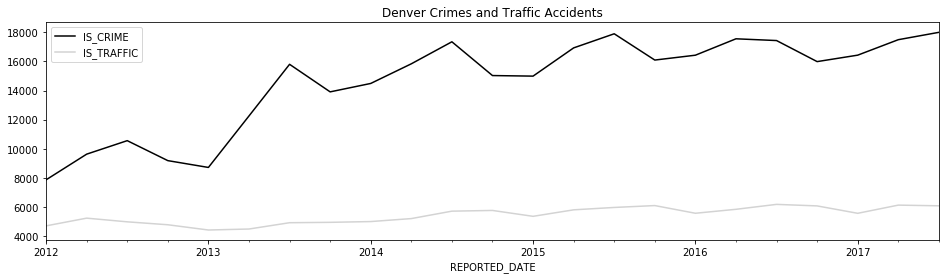

In [13]:
plot_kwargs = dict(figsize=(16,4), 
                   color=['black', 'lightgrey'], 
                   title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)

### Measuring crime by weekday and year

In [14]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [15]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [16]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday']
wd_counts.loc[days]

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

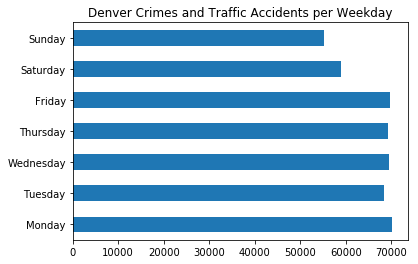

In [17]:
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

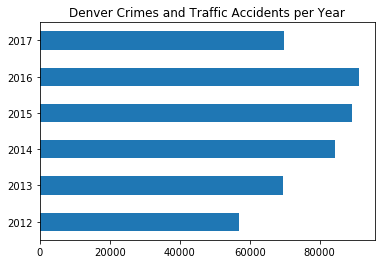

In [18]:
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                              .sort_index() \
                              .plot(kind='barh', title=title)

In [19]:
weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year

crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [20]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [21]:
round(272 / 365, 3)

0.745

In [22]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                                  .groupby(year) \
                                  .mean() \
                                  .round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [23]:
crime_pct.loc[2012:2016].median()

0.748

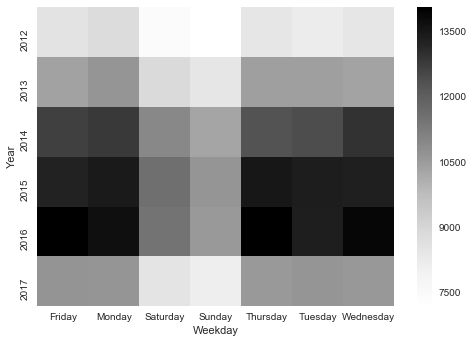

In [24]:
import seaborn as sns
sns.heatmap(crime_table, cmap='Greys')

In [25]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [26]:
den_100k = denver_pop.div(100000).squeeze()
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,1348,1385,1173,1133,1331,1291,1331
2013,1604,1642,1371,1305,1612,1609,1600
2014,1915,1935,1654,1552,1859,1879,1955
2015,1951,1978,1703,1562,1987,1967,1958
2016,2028,1978,1654,1522,2027,1924,2005
2017,1514,1508,1207,1152,1495,1507,1500


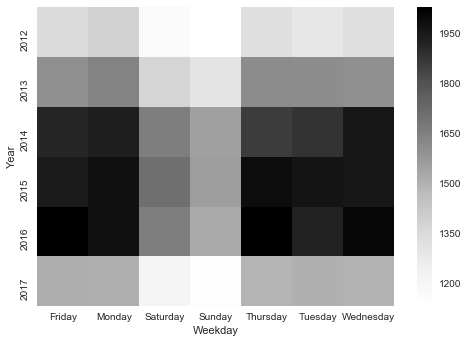

In [27]:
sns.heatmap(crime_table2, cmap='Greys')

### Grouping with anonymous functions with a DatetimeIndex

In [28]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [29]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0] != '_'])

['daysinmonth', 'days_in_month', 'is_month_start', 'dayofyear', 'week', 'normalize', 'weekday', 'is_year_end', 'tz', 'floor', 'year', 'to_pydatetime', 'strftime', 'date', 'weekday_name', 'time', 'second', 'to_datetime', 'tzinfo', 'round', 'is_leap_year', 'freq', 'ceil', 'tz_localize', 'freqstr', 'is_quarter_start', 'min', 'quarter', 'resolution', 'microsecond', 'minute', 'nanosecond', 'hour', 'tz_convert', 'dayofweek', 'month', 'is_month_end', 'offset', 'max', 'is_year_start', 'to_period', 'weekofyear', 'day', 'to_julian_date', 'is_quarter_end']


In [30]:
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [31]:
crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [32]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)['IS_CRIME', 'IS_TRAFFIC'].sum()
cr_final = cr_group.unstack()
cr_final.style.highlight_max(color='lightgrey')

### Grouping by a Timestamp and another column

In [33]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['JOB_DATE', 'HIRE_DATE'], 
                       index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [34]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [35]:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [36]:
'resample' in dir(employee.groupby('GENDER'))

True

In [37]:
'groupby' in dir(employee.resample('10AS'))

False

In [38]:
sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [39]:
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [40]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [41]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

In [42]:
sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [43]:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


### Finding the last time crime was 20% lower with merge_asof

In [44]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [45]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [46]:
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [47]:
all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()
all_data.head()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

In [48]:
all_data = all_data.sort_values().reset_index(name='Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12-31,murder,1
1,2013-01-31,arson,1
2,2016-05-31,murder,1
3,2012-12-31,murder,1
4,2016-12-31,murder,1


In [51]:
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'].reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype(int)
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [53]:
# if the data types of the merge keys are not same,
# it will produce a merge error,thus changed the dtype of Total_Goal to int64

goal['Total_Goal'] = goal['Total_Goal'].astype(np.int64)

In [54]:
pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', 
              by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last'))

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-01-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
3,2017-08-31,robbery,108,86,2015-03-31,86
4,2017-08-31,white-collar-crime,138,110,2016-10-31,110
5,2017-08-31,aggravated-assault,195,156,2016-05-31,154
6,2017-08-31,other-crimes-against-persons,376,300,2014-04-30,285
7,2017-08-31,burglary,432,345,2012-01-31,343
8,2017-08-31,auto-theft,599,479,2017-07-31,477
9,2017-08-31,drug-alcohol,636,508,2015-05-31,505
